In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv('data.csv')

In [3]:
dataset = dataset.head(n=20000)

In [4]:
dataset.shape

(20000, 8)

In [5]:
dataset['z'] = dataset['z'].str.replace(';', '')

In [6]:
dataset.head()

,ID,activity,timestamp,x,y,z,meter,device
0,1600,A,90426757696641,0.314944,-1.022277,-0.3099616,gyro,watch
1,1600,A,90426807196641,0.387382,-0.618541,-0.048971802,gyro,watch
2,1600,A,90426856696641,0.070999,-0.209480,-0.1959783,gyro,watch
3,1600,A,90426906196641,0.037975,0.254976,-0.1565635,gyro,watch
4,1600,A,90426955696641,0.073129,0.719431,-0.0010349044,gyro,watch


In [7]:
# Selecting X, Y 
X = dataset.iloc[:, [3,4]].values

In [8]:
X

array([[ 0.3149441 , -1.0222765 ],
       [ 0.3873821 , -0.61854124],
       [ 0.07099854, -0.20947972],
       ...,
       [-0.51776594, -0.18270989],
       [-1.021636  , -0.21679835],
       [ 0.04575897,  0.06230092]])

In [9]:
#3 Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.
from sklearn.cluster import KMeans
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11):     
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
    kmeans.fit(X)
#kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)

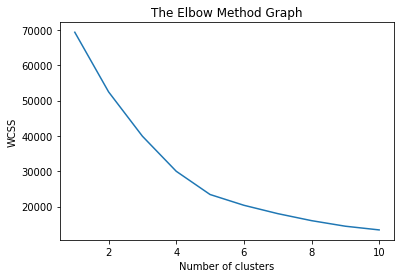

In [10]:
#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

In [12]:
y_kmeans

array([2, 2, 2, ..., 2, 2, 2])

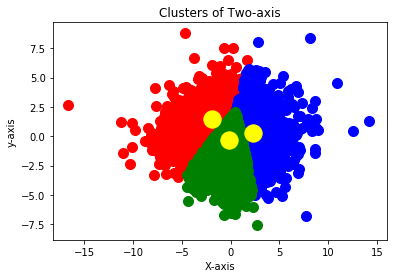

In [13]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Two-axis')
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.show()

In [14]:
dataset['Label'] = y_kmeans 

# Modeling

# Multiple Linear Regression

In [15]:
dataset= pd.read_csv('data.csv')
dataset['z'] = dataset['z'].str.replace(';', '')
dataset.head()

,ID,activity,timestamp,x,y,z,meter,device
0,1600,A,90426757696641,0.314944,-1.022277,-0.3099616,gyro,watch
1,1600,A,90426807196641,0.387382,-0.618541,-0.048971802,gyro,watch
2,1600,A,90426856696641,0.070999,-0.209480,-0.1959783,gyro,watch
3,1600,A,90426906196641,0.037975,0.254976,-0.1565635,gyro,watch
4,1600,A,90426955696641,0.073129,0.719431,-0.0010349044,gyro,watch


In [16]:
dataset.shape

(3440342, 8)

In [17]:
dataset = dataset[dataset['activity'] == 'A']

In [18]:
dataset = dataset.head(30000)

In [19]:
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, [5]].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
df = pd.DataFrame({'Real values': y_test[:, 0], 'Predicted values': y_pred[:, 0]})

In [24]:
df.head()

,Real values,Predicted values
0,1.6774682,0.551685
1,1.6191998,0.437084
2,2.767306,0.597297
3,-0.70141244,0.438736
4,-1.859095,-4.454473


# Polynomial Regression

In [25]:
dataset= pd.read_csv('data.csv')
dataset['z'] = dataset['z'].str.replace(';', '')
dataset = dataset[dataset['activity'] == 'A']
dataset = dataset.head(30000)
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, [5]].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [29]:
print(len(y_pred))
print(len(y_test))

6000
6000


In [30]:
df = pd.DataFrame({'Real values': y_test[:, 0], 'Predicted values': y_pred[:, 0]})
df.head()

,Real values,Predicted values
0,-1.2006375,-1.031807
1,-4.400218,-1.112149
2,3.5460582,1.655254
3,-1.8131658,-1.864008
4,-0.90556026,0.302245


In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.5169621885592217

# Linear Regression

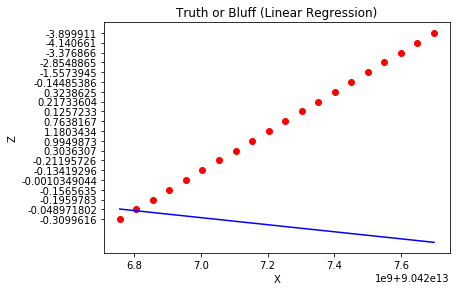

In [39]:
dataset= pd.read_csv('data.csv')
dataset['z'] = dataset['z'].str.replace(';', '')
dataset = dataset[dataset['activity'] == 'A']
dataset = dataset.head(20)
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 5].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.scatter(X, y, color='red')
    ax.plot(X, lin_reg.predict(X), color='blue')
    ax.set_title('Truth or Bluff (Linear Regression)')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    #ax.set_yticks([-0.3099616,0.21733604,-3.89991])
    plt.show()
    return
viz_linear()

# LSTM model for prediction

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df= pd.read_csv('data.csv')
df['z'] = df['z'].str.replace(';', '')
df = df[df['activity'] == 'A']
df = df.head(2000)

In [51]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [52]:
dataset = df.z.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [53]:
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [54]:
#setting lookback to 180 sec as time steps for prediction
look_back = 180
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [55]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1419 samples, validate on 219 samples
Epoch 1/20
1419/1419 [==============================] - 0s 312us/step - loss: 0.0443 - val_loss: 0.0310
Epoch 2/20
1419/1419 [==============================] - 0s 58us/step - loss: 0.0128 - val_loss: 0.0176
Epoch 3/20
1419/1419 [==============================] - 0s 56us/step - loss: 0.0101 - val_loss: 0.0177
Epoch 4/20
1419/1419 [==============================] - 0s 56us/step - loss: 0.0090 - val_loss: 0.0153
Epoch 5/20
1419/1419 [==============================] - 0s 56us/step - loss: 0.0082 - val_loss: 0.0143
Epoch 6/20
1419/1419 [==============================] - 0s 56us/step - loss: 0.0075 - val_loss: 0.0124
Epoch 7/20
1419/1419 [==============================] - 0s 58us/step - loss: 0.0072 - val_loss: 0.0118
Epoch 8/20
1419/1419 [==============================] - 0s 67us/step - loss: 0.0068 - val_loss: 0.0107
Epoch 9/20
1419/1419 [==============================] - 0s 68us/step - loss: 0.0062 - val_loss: 0.0092
Epoch 10/20
1419/1419 [==

In [56]:
from sklearn.metrics import mean_absolute_error
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.8415393545945951
Train Root Mean Squared Error: 1.0464863540591456
Test Mean Absolute Error: 0.8318026216523269
Test Root Mean Squared Error: 1.1004997432962917


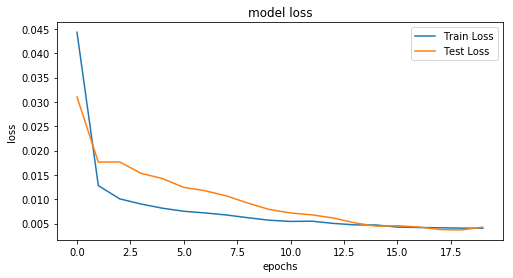

In [57]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

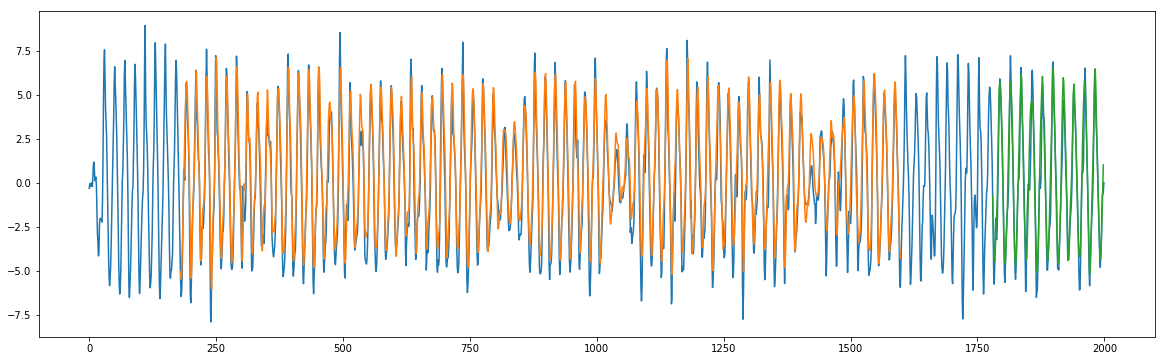

In [63]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()